In [28]:
#import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [29]:
################## IMPORT ALL GOOGLE TRENDS DATA ########################
prevent_flu = pd.read_csv('terms/prevent_flu.csv')
flu_2019 = pd.read_csv('terms/flu19.csv')
common_cold = pd.read_csv('terms/common_cold.csv')
oseltamivir = pd.read_csv('terms/oseltamivir.csv')
cough = pd.read_csv('terms/cough.csv')
gripe = pd.read_csv('terms/gripe.csv')
influenza = pd.read_csv('terms/influenza.csv')
vaccine = pd.read_csv('terms/vaccine.csv')
flu_symptoms = pd.read_csv('terms/flu_symptoms.csv')

################## IMPORT CDC DATA ##########################
# data_cdc = pd.read_csv('CDCDat/Clinical_Labs.csv')
data = pd.read_csv('allvariables2.csv')

################ RENAME COLUMNS IN DATA ##########################
flu_2019=flu_2019.rename(columns={'flu: (United States)':'pop searches'})
common_cold = common_cold.rename(columns={'Common cold: (United States)':'pop searches'})
oseltamivir = oseltamivir.rename(columns={'Oseltamivir: (United States)':'pop searches'})
prevent_flu = prevent_flu.rename(columns={'prevent flu: (United States)':'pop searches'})
cough = cough.rename(columns={'cough: (United States)':'pop searches'})
gripe = gripe.rename(columns={'gripe: (United States)':'pop searches'})
influenza = influenza.rename(columns={'influenza: (United States)':'pop searches'})
vaccine = vaccine.rename(columns={'vaccine: (United States)':'pop searches'})
flu_symptoms = flu_symptoms.rename(columns={'flu_symptoms: (United States)':'pop searches'})

In [30]:
import math
sines = pd.Series()
cos = pd.Series()
for i in range(len(data)):
    sines=sines.append(pd.Series(math.sin(i*0.04)*40))
    cos = cos.append(pd.Series(math.cos(i*0.04)*40))
len(sines)

809

In [31]:
cos.reset_index(drop=True,inplace=True)
data=pd.concat([data,cos],axis=1)
data=data.rename(columns={0:"cos"})


sines.reset_index(drop=True,inplace=True)
data=pd.concat([data,sines],axis=1)
data=data.rename(columns={0:"sines"})


data.head()

,index,YEAR,WEEK,TOTAL SPECIMENS,PERCENT POSITIVE,TOTAL A,TOTAL B,CC,COUGH,FLU_SYMP,FLU,GRIPE,INF_SYMP,INFL,OSELT,PREV,VACC,cos,sines
0,14,2004,1,6936,12.42790,853,9,76,65,55,21,25,80,28,5.0,0.0,3.0,40.000000,0.000000
1,15,2004,2,5411,9.33284,500,5,69,56,39,16,19,71,19,4.0,0.0,2.0,39.968004,1.599573
2,16,2004,3,4329,6.00601,257,3,63,55,31,14,31,30,15,3.0,0.0,3.0,39.872068,3.196588
3,17,2004,4,4166,3.98464,163,3,59,49,28,16,15,35,16,6.0,33.0,1.0,39.712345,4.788488
4,18,2004,5,3661,2.92270,105,2,50,49,20,16,15,26,16,5.0,0.0,1.0,39.489091,6.372728


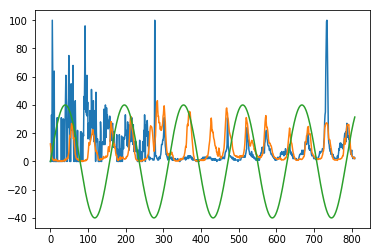

In [32]:
x=np.arange(0,809)
y=np.array(pd.Series(prevent_flu['pop searches']))
for i in range(len(y)):
    if y[i]=='<1':
        y[i]=0
    y[i]=int(y[i])
plt.plot(x,y)
y=data['PERCENT POSITIVE']
plt.plot(x,y)
y=data['sines']
plt.plot(x,y)

In [33]:
for i in range(len(data)):
    if data['FLU'].iloc[i]=='<1':
        data['FLU'].iloc[i]=0
    else:
        data['FLU'].iloc[i]=int(data['FLU'].iloc[i])

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [52]:
def week_derv(y1,y2):
    return y2-y1

def get_col_derv(colname):
    dervs = pd.Series()
    for i in range(len(data)-1):
        dervs=dervs.append(pd.Series(week_derv(data[colname].iloc[i],data[colname].iloc[i+1])))
    dervs.reset_index(drop=True,inplace=True)
    return dervs
    
dervs = pd.Series()
for i in range(len(data)-1):
    dervs=dervs.append(pd.Series(week_derv(data['PERCENT POSITIVE'].iloc[i],data['PERCENT POSITIVE'].iloc[i+1])))

dervs.reset_index(drop=True,inplace=True)
data=pd.concat([data,dervs],axis=1)
data=data.rename(columns={0:'dervs'})

In [48]:
temp = get_col_derv('FLU')
data=pd.concat([data,temp],axis=1)
data=data.rename(columns={0:'FLU dervs'})

In [55]:
temp = get_col_derv('FLU_SYMP')
data=pd.concat([data,temp],axis=1)
data=data.rename(columns={0:'FLU_SYMP dervs'})

In [64]:
temp = get_col_derv('CC')
data=pd.concat([data,temp],axis=1)
data=data.rename(columns={0:'CC dervs'})

In [65]:
temp = get_col_derv('COUGH')
data=pd.concat([data,temp],axis=1)
data=data.rename(columns={0:'COUGH dervs'})

In [66]:
temp = get_col_derv('INF_SYMP')
data=pd.concat([data,temp],axis=1)
data=data.rename(columns={0:'INF_SYMP dervs'})

In [75]:
temp = get_col_derv('sines')
data=pd.concat([data,temp],axis=1)
data=data.rename(columns={0:'sines dervs'})
temp = get_col_derv('cos')
data=pd.concat([data,temp],axis=1)
data=data.rename(columns={0:'cos dervs'})

In [62]:
data

,index,YEAR,WEEK,TOTAL SPECIMENS,PERCENT POSITIVE,TOTAL A,TOTAL B,CC,COUGH,FLU_SYMP,...,INF_SYMP,INFL,OSELT,PREV,VACC,cos,sines,FLU dervs,dervs,FLU_SYMP dervs
0,14,2004,1,6936,12.427900,853,9,76,65,55,...,80,28,5.0,0.0,3.0,40.000000,0.000000,-5.0,-3.095060,-16.0
1,15,2004,2,5411,9.332840,500,5,69,56,39,...,71,19,4.0,0.0,2.0,39.968004,1.599573,-2.0,-3.326830,-8.0
2,16,2004,3,4329,6.006010,257,3,63,55,31,...,30,15,3.0,0.0,3.0,39.872068,3.196588,2.0,-2.021370,-3.0
3,17,2004,4,4166,3.984640,163,3,59,49,28,...,35,16,6.0,33.0,1.0,39.712345,4.788488,0.0,-1.061940,-8.0
4,18,2004,5,3661,2.922700,105,2,50,49,20,...,26,16,5.0,0.0,1.0,39.489091,6.372728,1.0,-1.081340,6.0
5,19,2004,6,3530,1.841360,60,5,56,50,26,...,34,15,2.0,100.0,1.0,39.202663,7.946773,-3.0,-0.055650,-5.0
6,20,2004,7,3136,1.785710,48,8,45,49,21,...,17,13,2.0,66.0,1.0,38.853519,9.508105,-2.0,-0.300750,-4.0
7,21,2004,8,2559,1.484960,26,12,51,50,17,...,22,14,2.0,31.0,1.0,38.442218,11.054226,-3.0,-0.805971,-7.0
8,22,2004,9,2651,0.678989,10,8,43,48,10,...,56,11,1.0,0.0,1.0,37.969417,12.582662,-3.0,-0.088022,1.0
9,23,2004,10,2369,0.590967,8,6,44,41,11,...,0,9,2.0,0.0,1.0,37.435873,14.090969,1.0,-0.010351,1.0


Train RMSE:
6.538471671766092
Train
          true       pred      error
20    0.483676  16.111633  15.627957
46   14.513300   4.107359  10.405941
49   32.608300  22.063102  10.545198
67   26.268000  10.193080  16.074920
78   41.614600  11.095276  30.519324
79   27.527000  14.821662  12.705338
83   31.817300  43.556958  11.739658
84   24.362700   9.148623  15.214077
92    0.364964  13.884841  13.519877
111  27.705000   9.444981  18.260019
116   0.957055  11.077161  10.120106
117  29.283600  12.094549  17.189051
120  30.978500  20.480207  10.498293
122  28.177200  17.514766  10.662434
123  22.026500  10.684655  11.341845
129  25.036700   7.654326  17.382374
132  27.064300  37.873713  10.809413
133  31.980000  20.676322  11.303678
160  14.960300   4.725408  10.234892
178   0.156250  13.769409  13.613159
179  29.204000  19.037712  10.166288
181  12.427900  31.473451  19.045551
193  18.850800   8.124322  10.726478
199  33.523100  14.308965  19.214135
207  28.219800  17.349634  10.870166
20

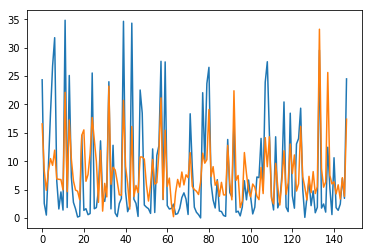

In [77]:
from sklearn.model_selection import train_test_split

data_train, data_val = train_test_split(data, test_size = 0.20, random_state = 0)
y_train = data_train['PERCENT POSITIVE']
y_val = data_val['PERCENT POSITIVE']

X_train = data_train[['INFL','FLU','OSELT','GRIPE','VACC','COUGH','CC','sines','FLU_SYMP','INF_SYMP','PREV','cos','FLU dervs','FLU_SYMP dervs','CC dervs','COUGH dervs','INF_SYMP dervs','sines dervs','cos dervs']]
X_val = data_val[['INFL','FLU','OSELT','GRIPE','VACC','COUGH','CC','sines','FLU_SYMP','INF_SYMP','PREV','cos','FLU dervs','FLU_SYMP dervs','CC dervs','COUGH dervs','INF_SYMP dervs','sines dervs','cos dervs']]

from sklearn.linear_model import ElasticNet

clf = ElasticNet(random_state=0)
clf.fit(X_train, y_train)

from sklearn.metrics import auc

y_train = np.array(y_train).reshape(len(y_train))

y_train_predict = clf.predict(X_train).reshape(len(X_train))
for i in range(len(y_train_predict)):
    if y_train_predict[i]<0.0:
        y_train_predict[i]=abs(y_train_predict[i])

train_rmse = np.sqrt(((y_train-y_train_predict)**2).mean())

train_deeta = {'true': y_train,"pred": y_train_predict,"error": abs(y_train-y_train_predict)}
print("Train RMSE:")
print(train_rmse)
train_compare = pd.DataFrame(train_deeta)

print("Train")
print(train_compare[train_compare['error']>10], "\n")

x=np.arange(0,147)
y=train_compare['true'].iloc[500:700]
plt.plot(x,y)

y=train_compare['pred'].iloc[500:700]
plt.plot(x,y)

numpy.ndarray

In [91]:
df = pd.read_csv('flu_annotations/AwarenessVsInfection2009TweetIDs.csv')

Train RMSE:
6.538471671766092
Train
        true       pred     error
0  17.975700  16.563621  1.412079
1   0.449438   9.819115  9.369677
2   9.751240   7.515140  2.236100
3   5.018200   8.022468  3.004268
4   4.776120   7.929763  3.153643 



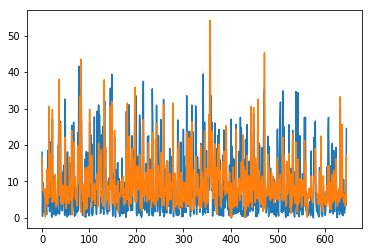

In [123]:

data_train, data_val = train_test_split(data, test_size = 0.20, random_state = 0)
y_train = data_train['PERCENT POSITIVE']
y_val = data_val['PERCENT POSITIVE']

X_train = data_train[['INFL','FLU','OSELT','GRIPE','VACC','COUGH','CC','sines','FLU_SYMP','INF_SYMP','PREV','cos','FLU dervs','FLU_SYMP dervs','CC dervs','COUGH dervs','INF_SYMP dervs','sines dervs','cos dervs']]
X_val = data_val[['INFL','FLU','OSELT','GRIPE','VACC','COUGH','CC','sines','FLU_SYMP','INF_SYMP','PREV','cos','FLU dervs','FLU_SYMP dervs','CC dervs','COUGH dervs','INF_SYMP dervs','sines dervs','cos dervs']]

from sklearn.linear_model import ElasticNet

clf = ElasticNet(random_state=0)
clf.fit(X_train, y_train)

from sklearn.metrics import auc

y_train = np.array(y_train).reshape(len(y_train))

y_train_predict = clf.predict(X_train).reshape(len(X_train))
for i in range(len(y_train_predict)):
    if y_train_predict[i]<0.0:
        y_train_predict[i]=abs(y_train_predict[i])

train_rmse = np.sqrt(((y_train-y_train_predict)**2).mean())

train_deeta = {'true': y_train,"pred": y_train_predict,"error": abs(y_train-y_train_predict)}
print("Train RMSE:")
print(train_rmse)
train_compare = pd.DataFrame(train_deeta)

print("Train")
print(train_compare.head(), "\n")

x=np.arange(0,len(train_compare))
y=train_compare['true']#.iloc[:40]
plt.plot(x,y)

y=train_compare['pred']#.iloc[:40]
plt.plot(x,y)

Train RMSE:
1.519349369027935
Train


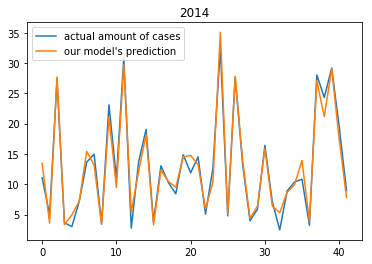

In [144]:
year = 2014
dat = data[data['YEAR']==year]
data_train, data_val = train_test_split(dat, test_size = 0.20, random_state = 0)
y_train = data_train['PERCENT POSITIVE']
y_val = data_val['PERCENT POSITIVE']

X_train = data_train[['INFL','FLU','OSELT','GRIPE','VACC','COUGH','CC','sines','FLU_SYMP','INF_SYMP','PREV','cos','FLU dervs','FLU_SYMP dervs','CC dervs','COUGH dervs','INF_SYMP dervs','sines dervs','cos dervs']]
X_val = data_val[['INFL','FLU','OSELT','GRIPE','VACC','COUGH','CC','sines','FLU_SYMP','INF_SYMP','PREV','cos','FLU dervs','FLU_SYMP dervs','CC dervs','COUGH dervs','INF_SYMP dervs','sines dervs','cos dervs']]

from sklearn.linear_model import ElasticNet

clf = ElasticNet(random_state=0)
clf.fit(X_train, y_train)

from sklearn.metrics import auc

y_train = np.array(y_train).reshape(len(y_train))

y_train_predict = clf.predict(X_train).reshape(len(X_train))
for i in range(len(y_train_predict)):
    if y_train_predict[i]<0.0:
        y_train_predict[i]=abs(y_train_predict[i])

train_rmse = np.sqrt(((y_train-y_train_predict)**2).mean())

train_deeta = {'true': y_train,"pred": y_train_predict,"error": abs(y_train-y_train_predict)}
print("Train RMSE:")
print(train_rmse)
train_compare = pd.DataFrame(train_deeta)

print("Train")
#print(train_compare[train_compare['error']>10], "\n")

x=np.arange(0,len(data_train))
y=train_compare['true']#.iloc[500:700]
plt.plot(x,y)

y=train_compare['pred']#.iloc[500:700]
plt.plot(x,y)

plt.title(str(year))
plt.legend(['actual amount of cases','our model\'s prediction'])